## Visualize the Superstore dataset with 4 methods (Excel, Tableau, SQL query, py Pandas).


### Total 7 Viz 

* Viz 1: Region Sales Overview
    * Profitability of each region
    * If certain region received more discounts than others.
<br><br>

* Viz 2: State Sales Overview
    * Profitability of each state
    * If certain state received more discounts than others.
<br><br>

* Viz 3: Profitability by category and sub-category
    * Profitability of each category and sub-category
<br><br>

* Viz 4: Most discounted sub-category
    * If certain sub-category received more discounts than others. 
<br><br> 

* Viz 5: Relationship between Sales & Profit
    * If there is a relationship between sales and profit.
    * If there is a relationship between (non-)discounted sales and profit.
<br><br>

* Viz 6: Relationship between Profit Ratio & Discount
    * To see how discount affect profitability.
<br><br>

* Viz 7: Customer Ranking
    * Profitability from each customer 
<br>

#### Notice: As we know from the superstore_to_db.ipynb, there are two issues regarding Product_ID and Postal_Code. Therefore, we won't use these two columns as part of analysis using python pandas dataframe (Method 4 of each viz).

In [27]:
import sqlite3
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 0)
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#full dataset
conn = sqlite3.connect(r'superstore.db')
sql = 'SELECT row.Row_ID, ord.Order_ID, ord.Order_Date, ord.Ship_Date, ord.ship_Mode, cus.Customer_ID, cus.Customer_Name, cus.Segment, city.Country, city.City, city.State, city.Postal_Code, city.Region, prod.Product_ID, prod.Category, prod.Subcategory, prod.Product_Name, row.Sales, row.Quantity, row.Discount, row.Profit FROM Row as row JOIN Orders as ord ON ord.Order_ID = row.Order_ID JOIN Customer as cus ON cus.Customer_ID = ord.Customer_ID JOIN City as city ON city.Postal_Code = ord.Postal_Code JOIN Product as prod ON prod.Product_ID = row.Product_ID'
df = pd.read_sql_query(sql, conn)
conn.close()

df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Subcategory,Product_Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,11/9/2013,11/12/2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,11/9/2013,11/12/2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,6/13/2013,6/17/2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200,2,0.00,6.8714
3,4,US-2012-108966,10/11/2012,10/18/2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,10/11/2012,10/18/2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Recap of Superstore ERD
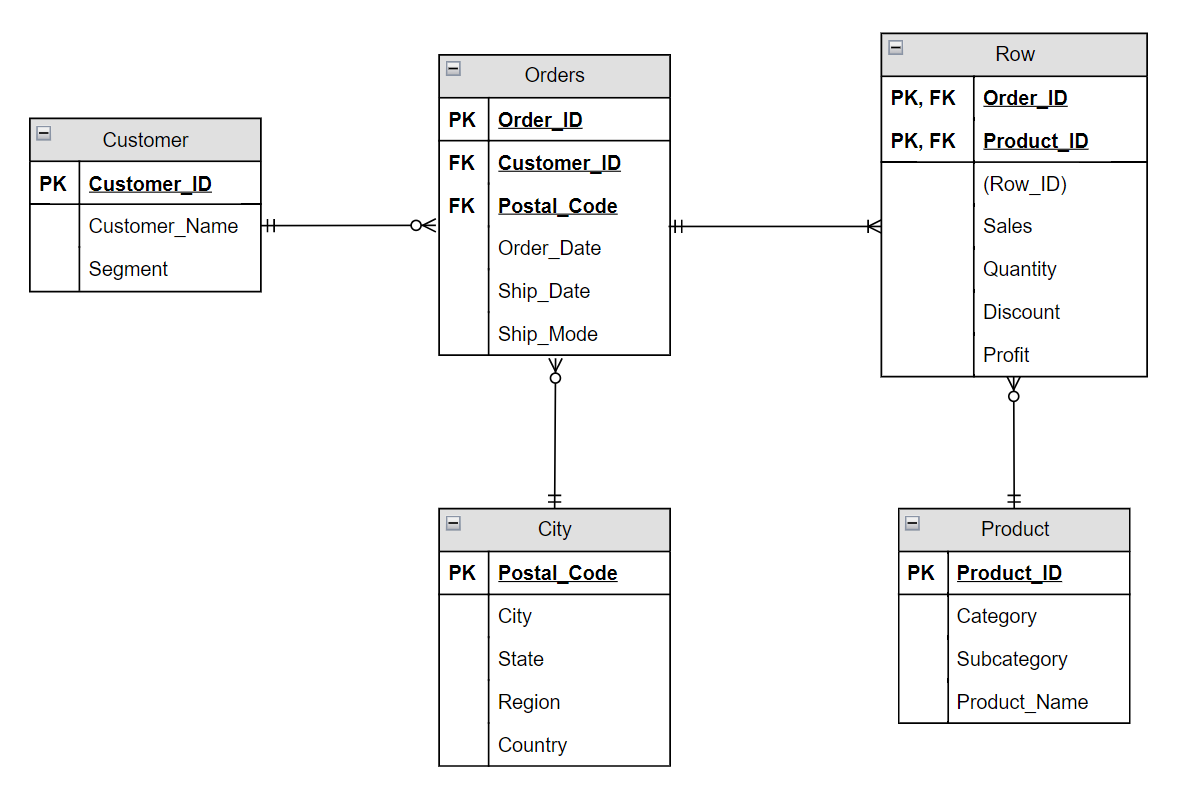

## Viz 1: Region Sales Overview

* Profitability of each region
* If certain region received more discounts than others.

### Method 1: Excel 
* Worksheet: Sales Overview
* Use Pivot table to aggregate Total Sales, Quantity sold, Profit, and Profit Ratio.
* Create a second Pivot table, click "add the data to the data model" before you click OK to enable "Distinct Count" to aggregate Sales per Customer
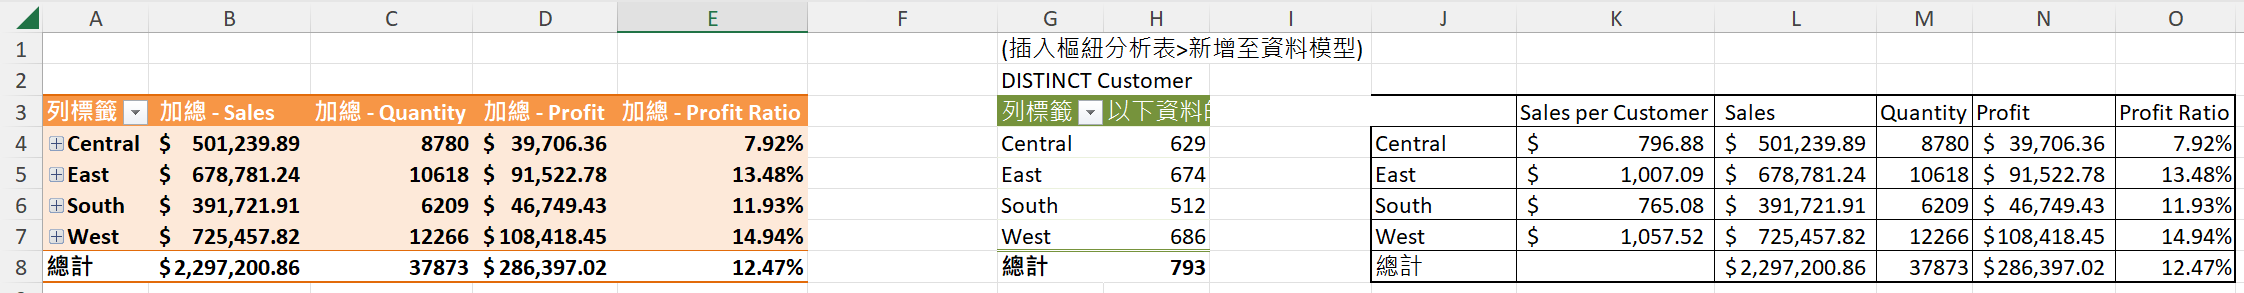

### Method 2: Tableau
* Create a Calculated field with "Sum([Sales])/COUNTD([Customer ID])" to calculate Sales per Customer
* Create another Calculated field with "Sum([Profit])/Sum([Sales])" to calculate Profit Ratio
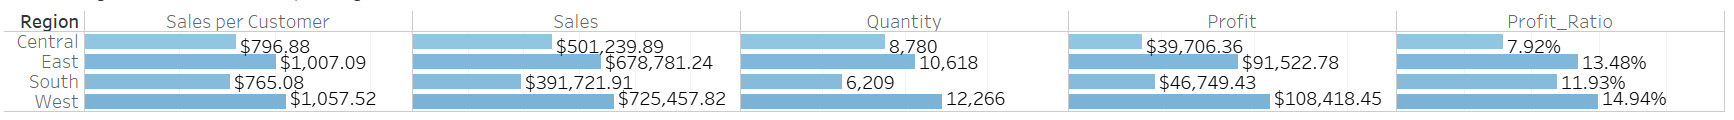

### Method 3: SQL query
* Use the following query. <br>
SELECT city.Region, (SUM(row.Sales)/COUNT(DISTINCT ord.Customer_ID)) as "Sales per Customer", SUM(row.Sales) as Sales, SUM(row.Quantity) as Quantity,SUM(row.Profit) as Profit, (SUM(row.Profit)/SUM(row.Sales)) as "Profit Ratio" <br>
FROM Orders as ord <br>
JOIN City as city ON city.Postal_Code = ord.Postal_Code <br>
JOIN Row as row ON row.Order_ID = ord.Order_ID <br>
GROUP BY city.Region

In [106]:
conn = sqlite3.connect(r'superstore.db')
sql = 'SELECT city.Region, (SUM(row.Sales)/COUNT(DISTINCT ord.Customer_ID)) as "Sales per Customer", SUM(row.Sales) as Sales, SUM(row.Quantity) as Quantity, SUM(row.Profit) as Profit, (SUM(row.Profit)/SUM(row.Sales)) as "Profit Ratio" FROM Orders as ord JOIN City as city ON city.Postal_Code = ord.Postal_Code JOIN Row as row ON row.Order_ID = ord.Order_ID GROUP BY city.Region'
df_viz1_sql = pd.read_sql_query(sql, conn)
conn.close()
df_viz1_sql

,Region,Sales per Customer,Sales,Quantity,Profit,Profit Ratio
0,Central,796.883769,501239.8908,8780,39706.3625,0.079216
1,East,1007.093828,678781.2400,10618,91522.7800,0.134834
2,South,765.081846,391721.9050,6209,46749.4303,0.119343
3,West,1057.518695,725457.8245,12266,108418.4489,0.149448


### Method 4: Pandas Dataframe

In [146]:
df_all = pd.read_csv('Superstore.csv')
df_1 = df_all[["Region","Customer ID", "Sales", "Quantity", "Profit"]]
df_dc=df_1.groupby(["Region"])[["Customer ID"]].agg(pd.Series.nunique)  #distinct customer
df_sqp = df_1.groupby(["Region"])[["Sales", "Quantity", "Profit"]].sum() #sales, quantity, profit
df_spc = df_sqp["Sales"]/df_dc["Customer ID"] #sales per customer
df_pr = df_sqp["Profit"]/df_sqp["Sales"] #profit ratio
df_viz1 = pd.concat([df_spc,df_sqp,df_pr], axis=1).reset_index()
df_viz1.columns = ["Region", "Sales per Customer", "Sales", "Quantity", "Profit", "Profit Ratio"]
df_viz1

,Region,Sales per Customer,Sales,Quantity,Profit,Profit Ratio
0,Central,796.883769,501239.8908,8780,39706.3625,0.079216
1,East,1007.093828,678781.2400,10618,91522.7800,0.134834
2,South,765.081846,391721.9050,6209,46749.4303,0.119343
3,West,1057.518695,725457.8245,12266,108418.4489,0.149448


## Viz 2: State Sales Overview

* Profitability of each state
* If certain state received more discounts than others.

### Method 1: Excel 
* Worksheet: State Overview
* Use Pivot table to aggregate Total Sales, Quantity sold, Profit, Profit Ratio, and average Discount of each State.

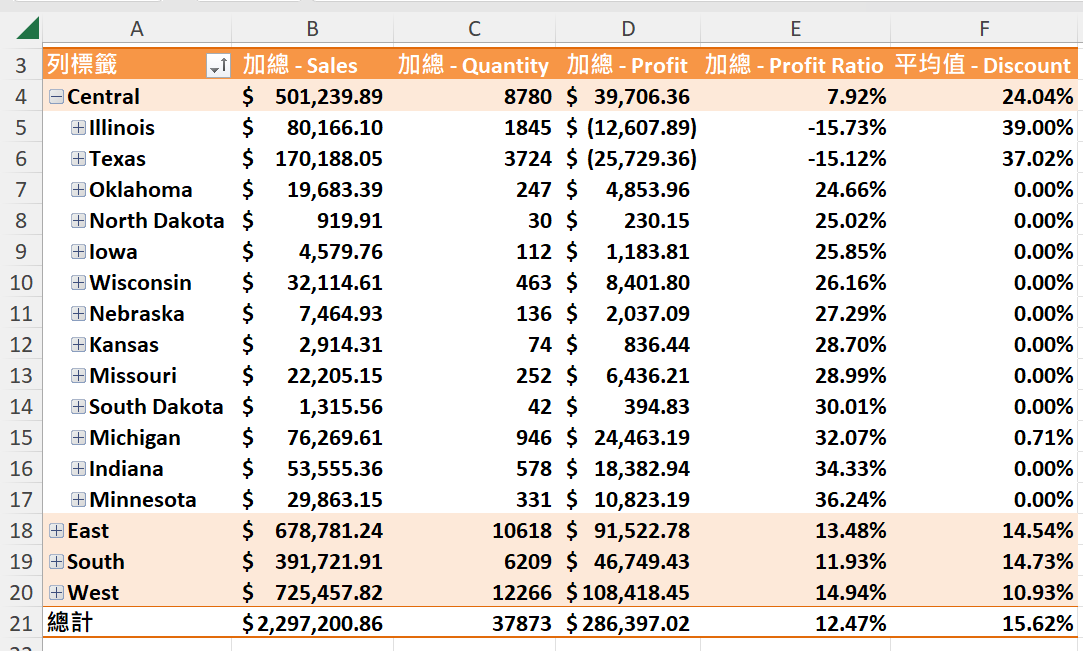

### Method 2: Tableau
* Use a Calculated field with "Sum([Profit])/Sum([Sales])" to calculate Profit Ratio

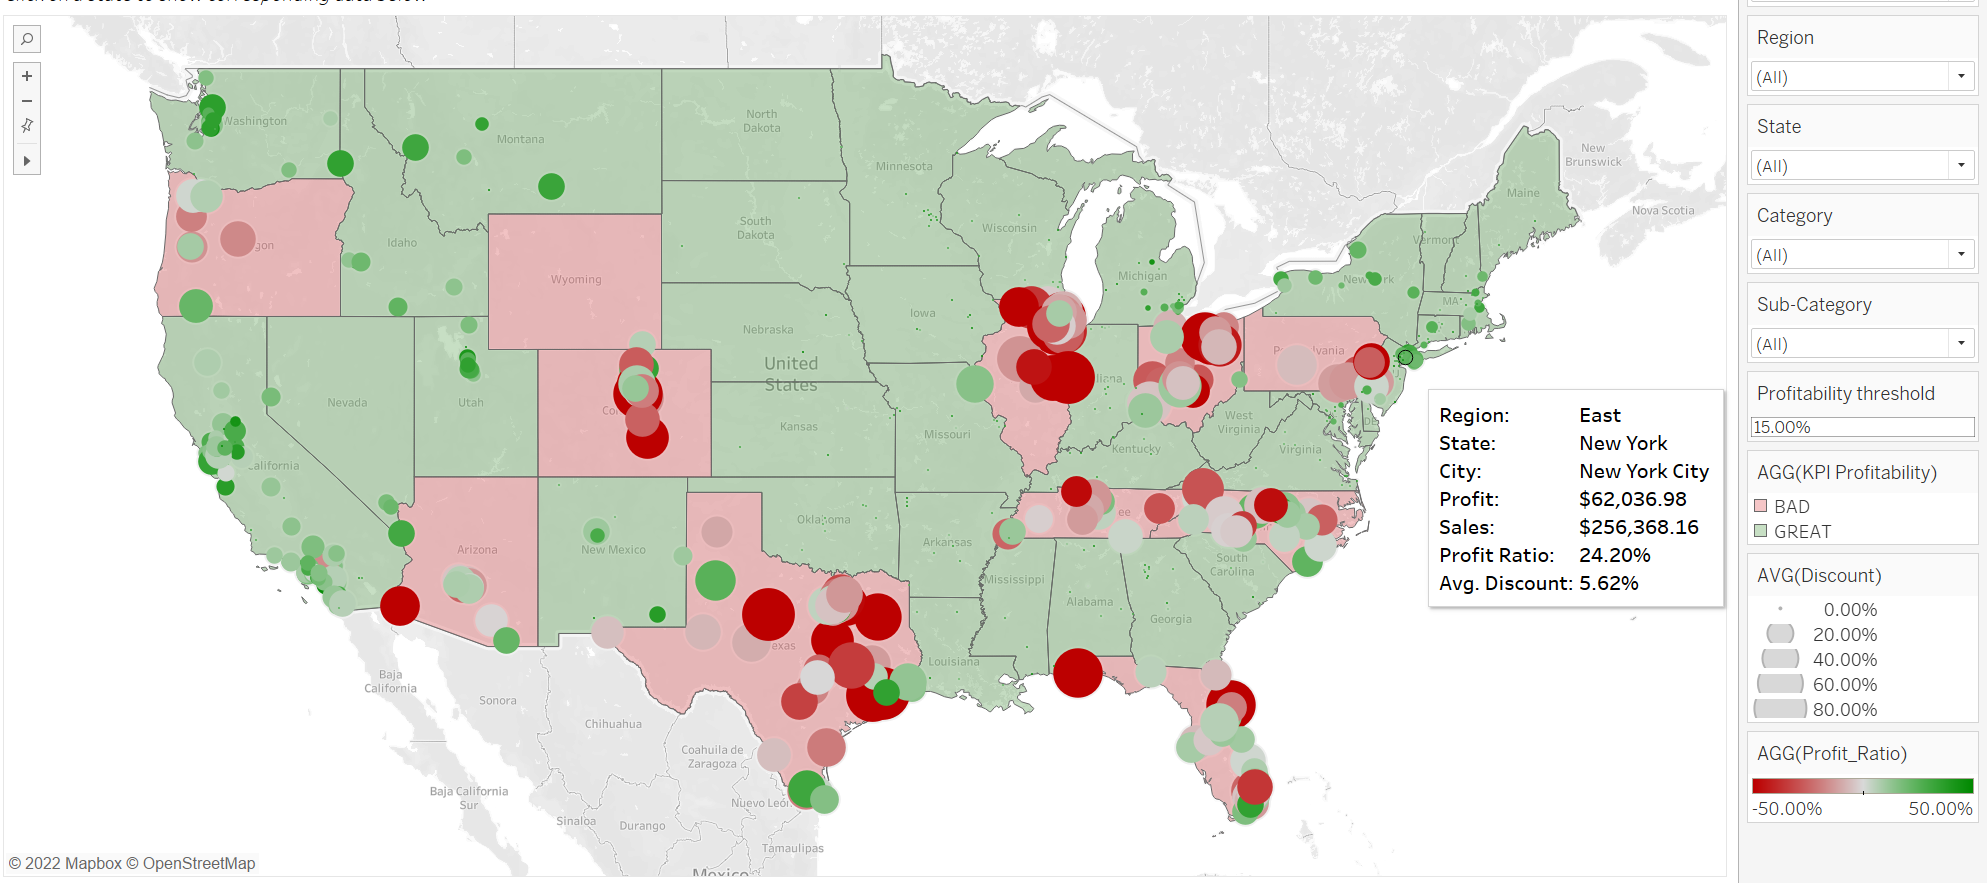

### Method 3: SQL query
* Use the following query. <br>
SELECT city.State, city.Region, SUM(row.Sales) as Sales, SUM(row.Quantity) as Quantity, SUM(row.Profit) as Profit, (SUM(row.Profit)/SUM(row.Sales)) as "Profit Ratio", AVG(row.Discount) as "Avg. Discount" <br> 
FROM Orders as ord <br>
JOIN City as city ON city.Postal_Code = ord.Postal_Code <br>
JOIN Row as row ON row.Order_ID = ord.Order_ID <br>
GROUP BY city.State <br>
ORDER BY "Profit Ratio"

In [5]:
conn = sqlite3.connect(r'superstore.db')
sql = 'SELECT city.State, city.Region, SUM(row.Sales) as Sales, SUM(row.Quantity) as Quantity, SUM(row.Profit) as Profit, (SUM(row.Profit)/SUM(row.Sales)) as "Profit Ratio", AVG(row.Discount) as "Avg. Discount" FROM Orders as ord JOIN City as city ON city.Postal_Code = ord.Postal_Code JOIN Row as row ON row.Order_ID = ord.Order_ID GROUP BY city.State ORDER BY "Profit Ratio"'
df_viz2_sql = pd.read_sql_query(sql, conn)
conn.close()
df_viz2_sql

,State,Region,Sales,Quantity,Profit,Profit Ratio,Avg. Discount
0,Ohio,East,78258.1360,1759,-16971.3766,-0.216864,0.324947
1,Colorado,West,32108.1180,693,-6527.8579,-0.203309,0.316484
2,Tennessee,South,30661.8730,681,-5341.6936,-0.174213,0.291257
3,Illinois,Central,80166.1010,1845,-12607.8870,-0.157272,0.390041
4,Texas,Central,170188.0458,3724,-25729.3563,-0.151182,0.370193
5,North Carolina,South,55603.1640,983,-7490.9122,-0.134721,0.283534
6,Pennsylvania,East,116511.9140,2153,-15559.9603,-0.133548,0.328620
7,Arizona,West,35282.0010,862,-3427.9246,-0.097158,0.303571
8,Oregon,West,17431.1500,499,-1190.4705,-0.068296,0.288710
9,Florida,South,89473.7080,1379,-3399.3017,-0.037992,0.299347


### Method 4: Pandas Dataframe

In [6]:
df_all = pd.read_csv('Superstore.csv')
df_2 = df_all[["Region","State", "Customer ID", "Sales", "Quantity", "Profit", "Discount"]]
df_sr = df_2[["State","Region"]].drop_duplicates().sort_values(by=['State']).reset_index(drop=True) #distinct State and Region
df_sqp = df_2.groupby(["State"])[["Sales", "Quantity", "Profit"]].sum().reset_index(drop=True) #sales, quantity, profit
df_disc = df_2.groupby(["State"])[["Discount"]].mean().reset_index(drop=True) #Avg discount
df_pr = df_sqp["Profit"]/df_sqp["Sales"] #profit ratio
df_viz2 = pd.concat([df_sr, df_sqp, df_pr, df_disc], axis=1)
df_viz2.columns = ["State", "Region", "Sales", "Quantity", "Profit", "Profit Ratio", "Avg. Discount"]
df_viz2.sort_values(by=['Profit Ratio']).reset_index(drop=True)

,State,Region,Sales,Quantity,Profit,Profit Ratio,Avg. Discount
0,Ohio,East,78258.1360,1759,-16971.3766,-0.216864,0.324947
1,Colorado,West,32108.1180,693,-6527.8579,-0.203309,0.316484
2,Tennessee,South,30661.8730,681,-5341.6936,-0.174213,0.291257
3,Illinois,Central,80166.1010,1845,-12607.8870,-0.157272,0.390041
4,Texas,Central,170188.0458,3724,-25729.3563,-0.151182,0.370193
5,North Carolina,South,55603.1640,983,-7490.9122,-0.134721,0.283534
6,Pennsylvania,East,116511.9140,2153,-15559.9603,-0.133548,0.328620
7,Arizona,West,35282.0010,862,-3427.9246,-0.097158,0.303571
8,Oregon,West,17431.1500,499,-1190.4705,-0.068296,0.288710
9,Florida,South,89473.7080,1379,-3399.3017,-0.037992,0.299347


## Viz 3: Profitability by category and sub-category

* Profitability of each category and sub-category


### Method 1: Excel 
* Worksheet: Profitability by category
* Use Pivot table to aggregate Profit, % of Total Profit, Profit Ratio of each category and sub-category.
* Add a filter to further identify Profitability by sub-category with and without discount.
* Use conditional formatting to color Profit Ratio with a threshold of 10% and 25%

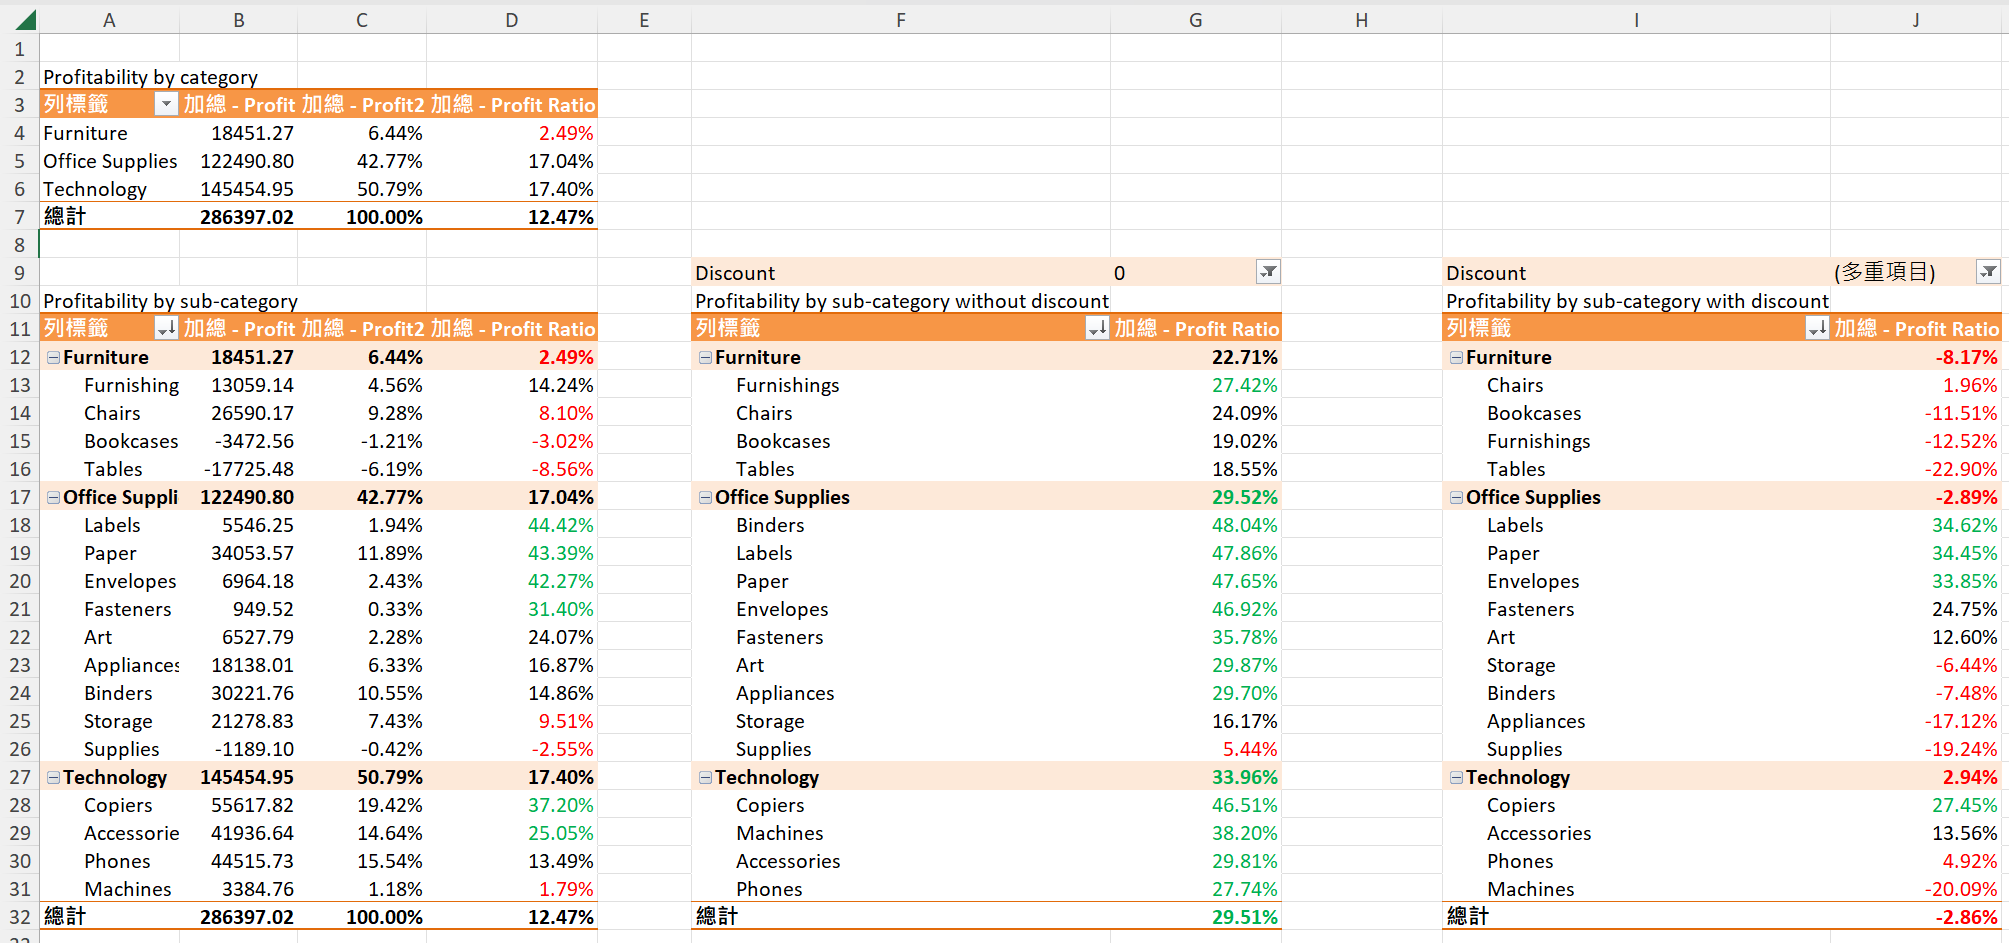

### Method 2: Tableau
* Use a Calculated field with "Sum([Profit])/Sum([Sales])" to calculate Profit Ratio
* Use Qucik Table Calculation in Measure Value to calculate % of Total Profit
* Color rows by Profit Ratio, with a threshold of 10% and 25%

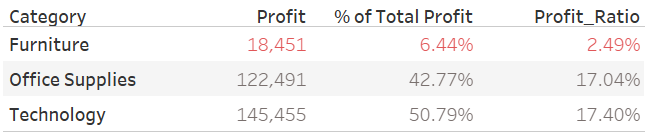

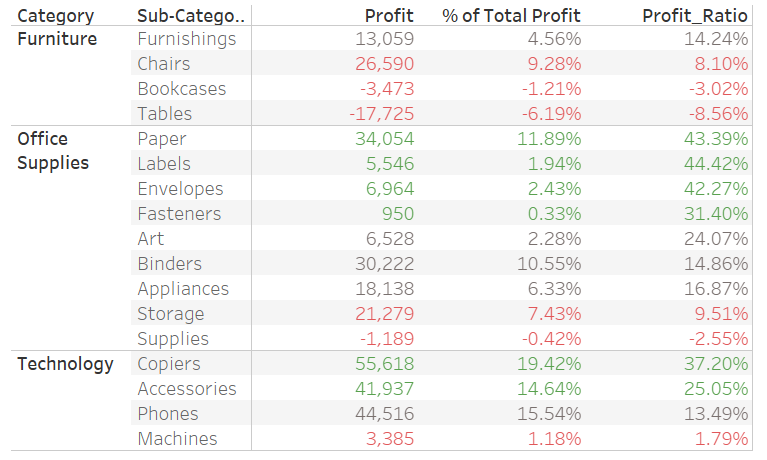

### Method 3: SQL query
* Use the following query. <br>
SELECT prod.Category, prod.Subcategory, SUM(row.Profit) as Profit, (SUM(row.Profit)/(SELECT SUM(row.Profit) as Profit FROM Row as row)) as "% of Total Profit", (SUM(row.Profit)/SUM(row.Sales)) as "Profit Ratio" <br>
FROM Row as row <br>
JOIN Product as prod ON prod.Product_ID = row.Product_ID <br>
GROUP BY prod.Subcategory <br>
ORDER BY Category, "Profit Ratio" DESC

In [74]:
conn = sqlite3.connect(r'superstore.db')
sql = 'SELECT prod.Category, prod.Subcategory, SUM(row.Profit) as Profit, (SUM(row.Profit)/(SELECT SUM(row.Profit) as Profit FROM Row as row)) as "% of Total Profit", (SUM(row.Profit)/SUM(row.Sales)) as "Profit Ratio" FROM Row as row JOIN Product as prod ON prod.Product_ID = row.Product_ID GROUP BY prod.Subcategory ORDER BY Category, "Profit Ratio" DESC'
df_viz3_sql = pd.read_sql_query(sql, conn)
conn.close()
df_viz3_sql

,Category,Subcategory,Profit,% of Total Profit,Profit Ratio
0,Furniture,Furnishings,13059.1436,0.045598,0.142404
1,Furniture,Chairs,26590.1663,0.092844,0.080957
2,Furniture,Bookcases,-3472.5560,-0.012125,-0.030228
3,Furniture,Tables,-17725.4811,-0.061891,-0.085645
4,Office Supplies,Labels,5546.2540,0.019366,0.444187
5,Office Supplies,Paper,34053.5693,0.118903,0.433918
6,Office Supplies,Envelopes,6964.1767,0.024317,0.422676
7,Office Supplies,Fasteners,949.5182,0.003315,0.313965
8,Office Supplies,Art,6527.7870,0.022793,0.240711
9,Office Supplies,Appliances,18138.0054,0.063332,0.168675


In [127]:
df_all = pd.read_csv('Superstore.csv')
df_3 = df_all[["Category","Sub-Category", "Profit", "Sales"]]
df_c = df_3[["Category","Sub-Category"]].drop_duplicates().sort_values(by=['Sub-Category']).reset_index(drop=True) #distinct State and Region
df_ps = df_3.groupby(["Sub-Category"])[["Profit","Sales"]].sum().reset_index(drop=True) #profit
df_potp = df_ps["Profit"].div(float(df_3[["Profit"]].sum())) #% of total profit
df_pr = df_ps["Profit"]/df_ps["Sales"] #profit ratio
df_viz3 = pd.concat([df_c, df_p["Profit"], df_potp, df_pr], axis=1)
df_viz3.columns = ["Category", "Sub-Category", "Profit", "% of Total Profit", "Profit Ratio"]
df_viz3_sort = df_viz3.sort_values(by=["Category", "Profit Ratio"], ascending=[True, False]).reset_index(drop=True)
df_viz3_color = df_viz3_sort.style.applymap(lambda x: 'color : red' if x<0.1 else ('color : green' if x>0.25 else 'color : black'), subset = pd.IndexSlice[:, ['Profit Ratio']])
df_viz3_color

,Category,Sub-Category,Profit,% of Total Profit,Profit Ratio
0,Furniture,Furnishings,13059.143600,0.045598,0.142404
1,Furniture,Chairs,26590.166300,0.092844,0.080957
2,Furniture,Bookcases,-3472.556000,-0.012125,-0.030228
3,Furniture,Tables,-17725.481100,-0.061891,-0.085645
4,Office Supplies,Labels,5546.254000,0.019366,0.444187
5,Office Supplies,Paper,34053.569300,0.118903,0.433918
6,Office Supplies,Envelopes,6964.176700,0.024317,0.422676
7,Office Supplies,Fasteners,949.518200,0.003315,0.313965
8,Office Supplies,Art,6527.787000,0.022793,0.240711
9,Office Supplies,Appliances,18138.005400,0.063332,0.168675


## Viz 4: Most discounted sub-category

* If certain sub-category received more discounts than others. 

### Method 1: Excel 
* Worksheet: Most discounted sub-category
* Use Pivot table to aggregate average Discount of each sub-category.

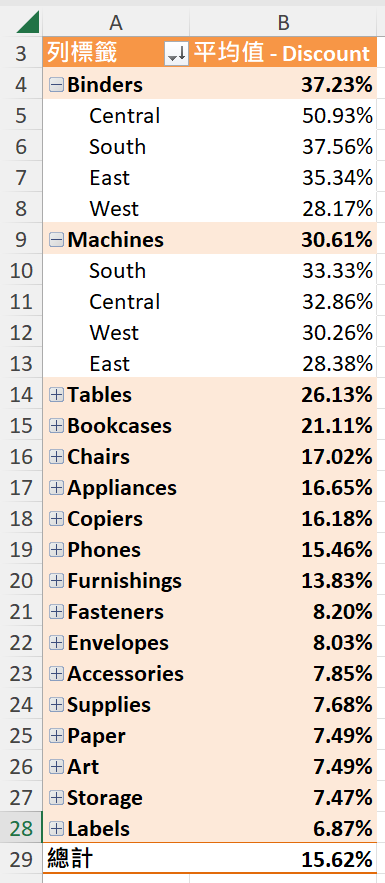

### Method 2: Tableau
* Use a Calculated field with "Sum([Profit])/Sum([Sales])" to calculate Profit Ratio
* Color the bars by Profit Ratio, with a threshold of 15%


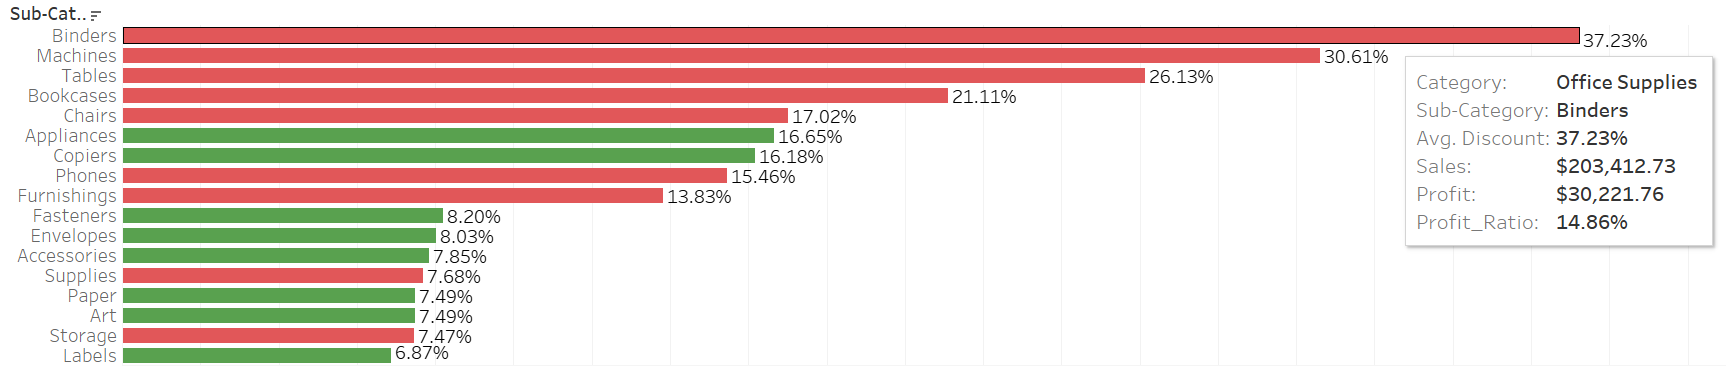

### Method 3: SQL query
* Use the following query. <br>
SELECT prod.Subcategory, AVG(row.Discount) as "Avg. Discount" <br>
FROM Row as row <br>
JOIN Product as prod ON prod.Product_ID = row.Product_ID <br>
GROUP BY prod.Subcategory <br>
ORDER BY "Discount" DESC

In [8]:
conn = sqlite3.connect(r'superstore.db')
sql = 'SELECT prod.Subcategory, AVG(row.Discount) as "Avg. Discount" FROM Row as row JOIN Product as prod ON prod.Product_ID = row.Product_ID GROUP BY prod.Subcategory ORDER BY "Avg. Discount" DESC'
df_viz4_sql = pd.read_sql_query(sql, conn)
conn.close()
df_viz4_sql

,Subcategory,Avg. Discount
0,Binders,0.372292
1,Machines,0.306087
2,Tables,0.261285
3,Bookcases,0.211140
4,Chairs,0.170178
5,Appliances,0.166524
6,Copiers,0.161765
7,Phones,0.154556
8,Furnishings,0.138349
9,Fasteners,0.082028


### Method 4: Pandas Dataframe

In [60]:
df_all = pd.read_csv('Superstore.csv')
df_4 = df_all[["Sub-Category", "Discount"]]
df_viz4 = df_4.groupby(["Sub-Category"])[["Discount"]].mean().sort_values(by=['Discount'], ascending=False).reset_index()
df_viz4.columns = ["Sub-Category", "Avg. Discount"]
df_viz4

,Sub-Category,Avg. Discount
0,Binders,0.372292
1,Machines,0.306087
2,Tables,0.261285
3,Bookcases,0.211140
4,Chairs,0.170178
5,Appliances,0.166524
6,Copiers,0.161765
7,Phones,0.154556
8,Furnishings,0.138349
9,Fasteners,0.082028


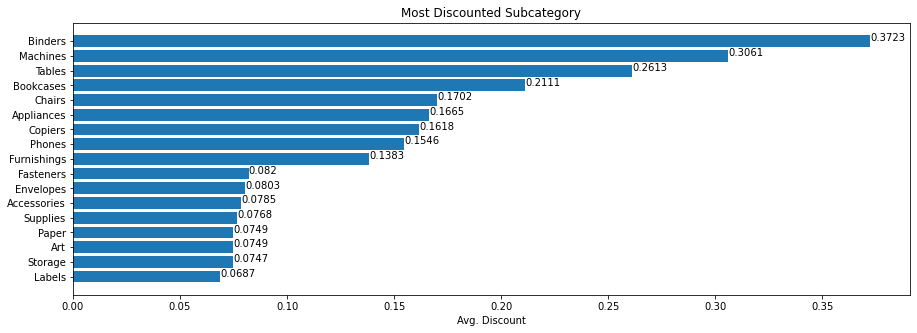

In [65]:
df_viz4 = df_viz4.sort_values(by=['Avg. Discount'])
bars = plt.barh(df_viz4["Sub-Category"],df_viz4["Avg. Discount"].round(4))
for  bar in bars:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    plt.text(width, label_y, s=f'{width}')
    
plt.title("Most Discounted Subcategory")
plt.xlabel("Avg. Discount")
plt.rcParams['figure.figsize'] = [15, 5]
plt.show()

## Viz 5: Relationship between Sales & Profit

* If there is a relationship between sales and profit.
* If there is a relationship between (non-)discounted sales and profit.

### Method 1: Excel 
* Worksheet: Sales & Profit
* Two scatter plots show the relationship between Sales & Profit.
* Two other scatter plots show the relationship between Sales & Profit with and without discount.

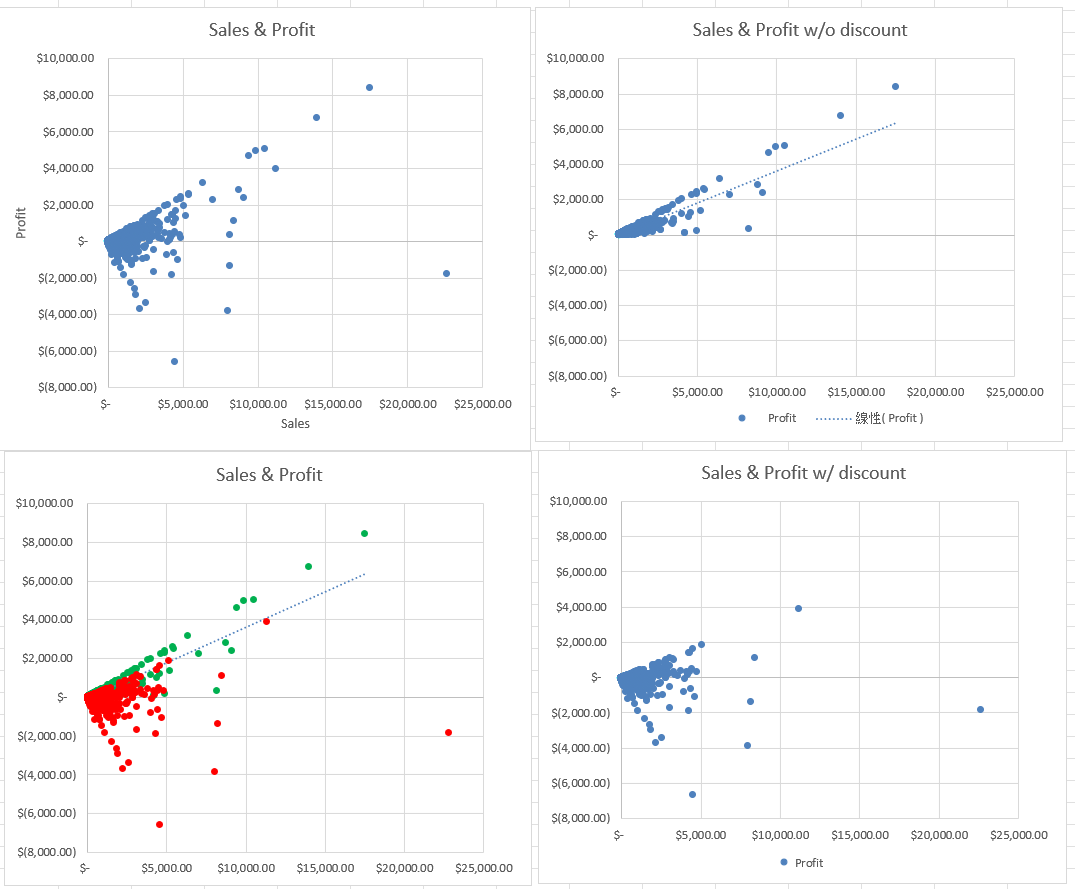

### Method 2: Tableau
* Use a Calculated field with "Sum([Profit])/Sum([Sales])" to calculate Profit Ratio
* A red circle means a discounted sales, while gray means non-discounted sales.
* The bigger the size of the circle, the greater the discount were given.

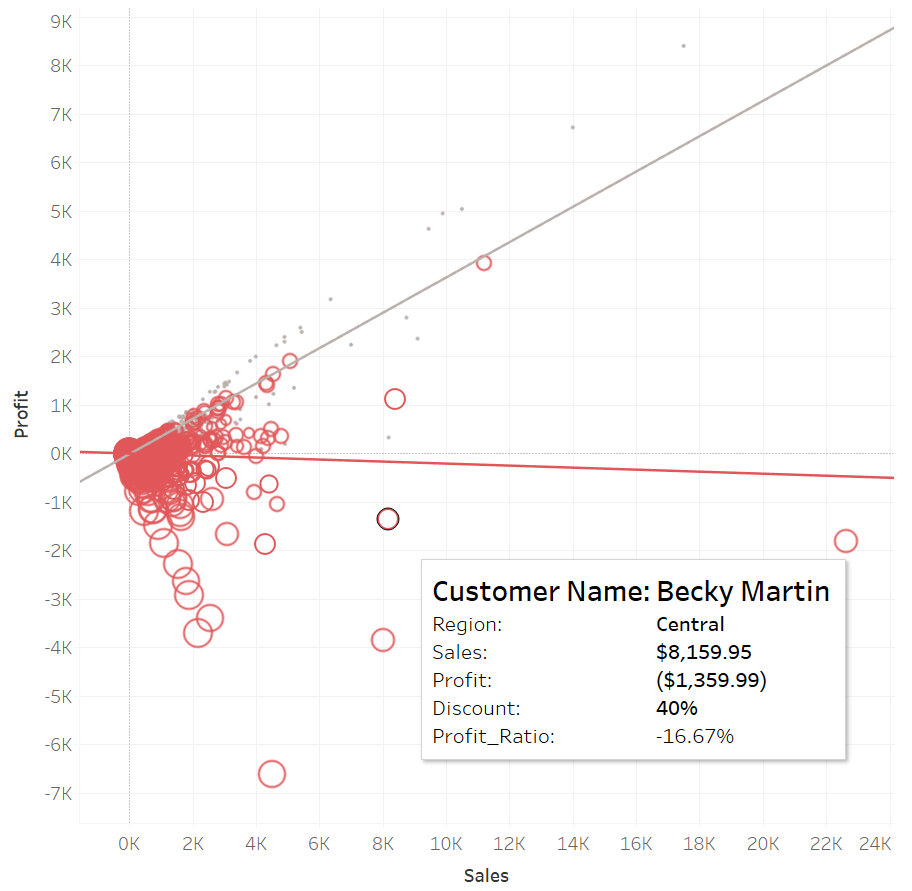

### Method 3: SQL query
* Use the following query. <br>
SELECT row.Sales, row.Profit, row.Discount <br>
FROM Row as row <br>
WHERE row.Discount = 0

In [164]:
conn = sqlite3.connect(r'superstore.db')
sql = 'SELECT row.Sales, row.Profit, row.Discount FROM Row as row WHERE row.Discount = 0'
df_viz5_sql_wod = pd.read_sql_query(sql, conn)
sql = 'SELECT row.Sales, row.Profit, row.Discount FROM Row as row WHERE row.Discount != 0'
df_viz5_sql_wd = pd.read_sql_query(sql, conn)

conn.close()
print(df_viz5_sql_wod.head())
print(df_viz5_sql_wd.head())

    Sales    Profit  Discount
0  261.96  41.9136   0.0     
1  731.94  219.5820  0.0     
2  14.62   6.8714    0.0     
3  48.86   14.1694   0.0     
4  7.28    1.9656    0.0     
       Sales    Profit  Discount
0  957.5775  -383.0310  0.45    
1  22.3680    2.5164    0.20    
2  907.1520   90.7152   0.20    
3  18.5040    5.7825    0.20    
4  1706.1840  85.3092   0.20    


### Method 4: Pandas Dataframe

In [162]:
df_all = pd.read_csv('Superstore.csv')
df_5 = df_all[["Sales", "Profit", "Discount"]]
df_5_wod = df_5[df_5['Discount'] == 0]
df_5_wd = df_5[df_5['Discount'] != 0]
print(df_5_wod.head())
print(df_5_wd.head())

    Sales    Profit  Discount
0  261.96  41.9136   0.0     
1  731.94  219.5820  0.0     
2  14.62   6.8714    0.0     
5  48.86   14.1694   0.0     
6  7.28    1.9656    0.0     
        Sales    Profit  Discount
3   957.5775  -383.0310  0.45    
4   22.3680    2.5164    0.20    
7   907.1520   90.7152   0.20    
8   18.5040    5.7825    0.20    
10  1706.1840  85.3092   0.20    


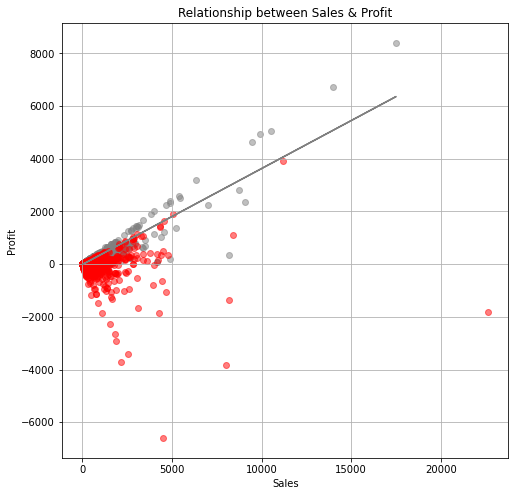

In [184]:
plt.scatter(df_5_wod["Sales"],df_5_wod["Profit"], c="gray", alpha=0.5)
plt.title("Relationship between Sales & Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.rcParams['figure.figsize'] = [8, 8]
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(df_5_wod["Sales"],df_5_wod["Profit"], 1)
plt.plot(df_5_wod["Sales"], m*df_5_wod["Sales"]+b, c="gray")

plt.scatter(df_5_wd["Sales"],df_5_wd["Profit"], c="red", alpha=0.5)
plt.title("Relationship between Sales & Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.grid()
plt.rcParams['figure.figsize'] = [8, 8]


plt.show()

## Viz 6: Relationship between Profit Ratio & Discount

* To see how discount affect profitability.

### Method 1: Excel 
* Worksheet: State Overview
* Use Pivot table to aggregate Total Sales, Quantity sold, Profit, Profit Ratio, and average Discount of each State.
* Warning pop-up "Maximum number of data series per chart is 255" if trying to exchange axes. 

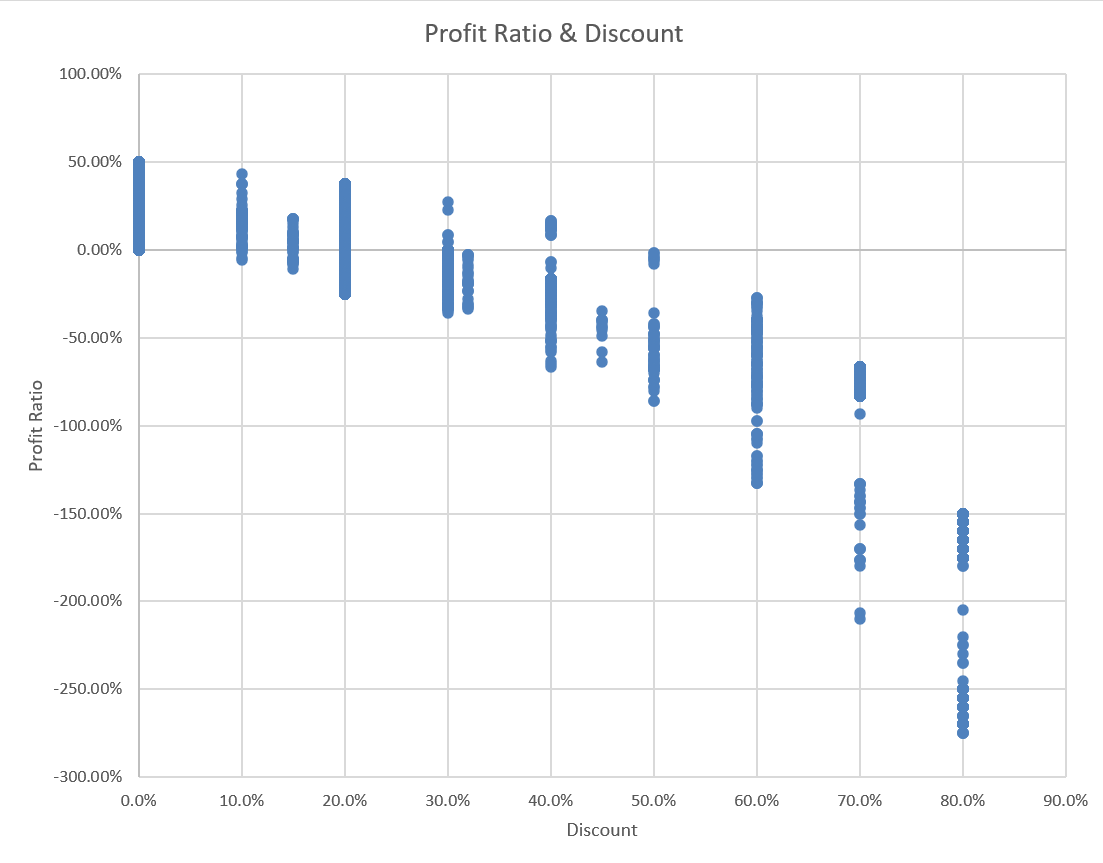

### Method 2: Tableau
* Use a Calculated field with "Sum([Profit])/Sum([Sales])" to calculate Profit Ratio

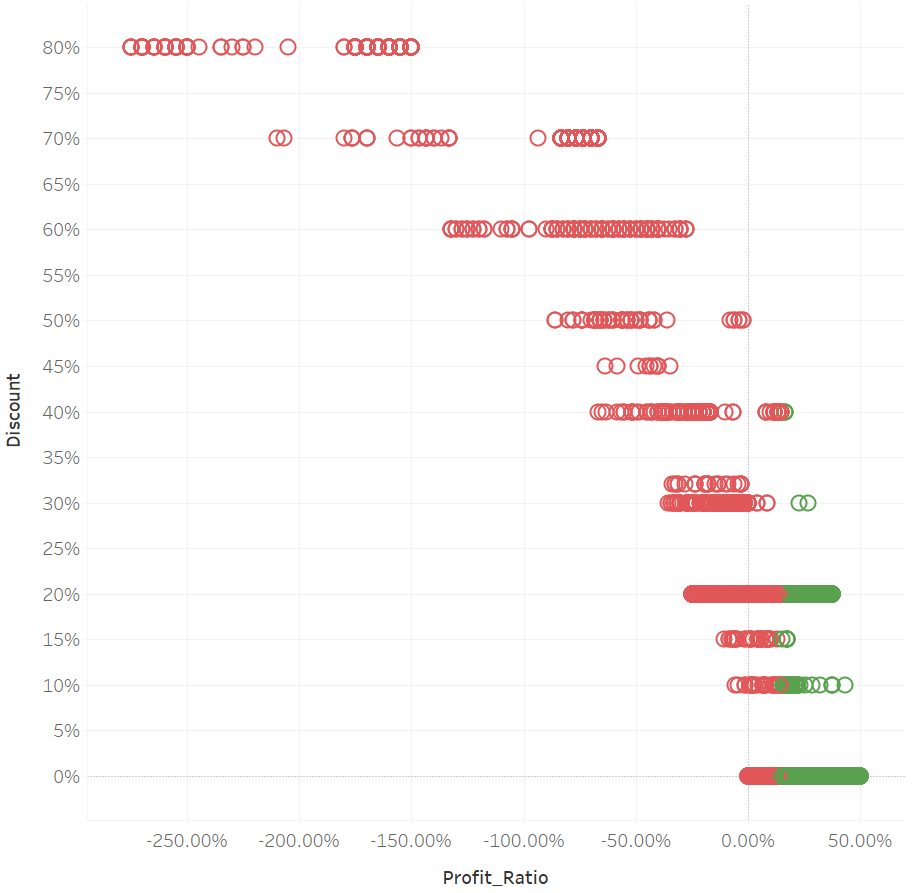

### Method 3: SQL query
* Use the following query. <br>
SELECT (row.Profit/row.Sales) as "Profit Ratio", row.Discount <br>
FROM Row as row <br>
WHERE "Profit Ratio" >= 0.15

In [192]:
conn = sqlite3.connect(r'superstore.db')
sql = 'SELECT (row.Profit/row.Sales) as "Profit Ratio", row.Discount FROM Row as row WHERE "Profit Ratio" >= 0.15'
df_viz6_sql_prh = pd.read_sql_query(sql, conn)
sql = 'SELECT (row.Profit/row.Sales) as "Profit Ratio", row.Discount FROM Row as row WHERE "Profit Ratio" < 0.15'
df_viz6_sql_prl = pd.read_sql_query(sql, conn)

conn.close()
print(df_viz6_sql_prh.head())
print(df_viz6_sql_prl.head())

   Profit Ratio  Discount
0  0.16          0.0     
1  0.30          0.0     
2  0.47          0.0     
3  0.29          0.0     
4  0.27          0.0     
   Profit Ratio  Discount
0 -0.4000        0.45    
1  0.1125        0.20    
2  0.1000        0.20    
3  0.0500        0.20    
4  0.0750        0.20    


### Method 4: Pandas Dataframe

In [195]:
df_all = pd.read_csv('Superstore.csv')
df_6 = df_all[["Sales", "Profit", "Discount"]]
df_pr = df_6["Profit"]/df_6["Sales"] #profit ratio
df_viz6 = pd.concat([df_pr, df_6["Discount"]], axis=1)
df_viz6.columns = ["Profit Ratio", "Discount"]

df_6_prh = df_viz6[df_viz6['Profit Ratio'] >= 0.15]
df_6_prl = df_viz6[df_viz6['Profit Ratio'] < 0.15]
print(df_6_prh.head())
print(df_6_prl.head())

   Profit Ratio  Discount
0  0.16          0.0     
1  0.30          0.0     
2  0.47          0.0     
5  0.29          0.0     
6  0.27          0.0     
    Profit Ratio  Discount
3  -0.4000        0.45    
4   0.1125        0.20    
7   0.1000        0.20    
10  0.0500        0.20    
11  0.0750        0.20    


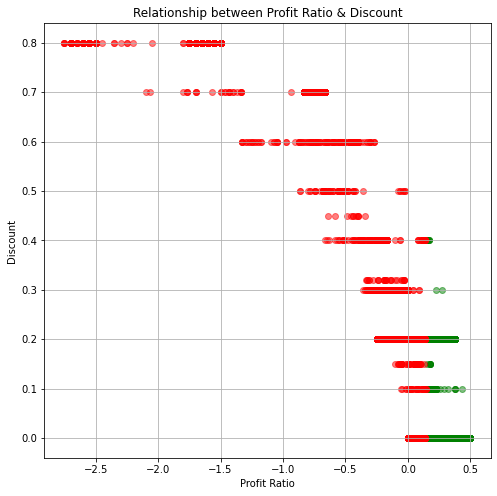

In [196]:
plt.scatter(df_6_prh["Profit Ratio"],df_6_prh["Discount"], c="green", alpha=0.5)
plt.title("Relationship between Profit Ratio & Discount")
plt.xlabel("Profit Ratio")
plt.ylabel("Discount")
plt.rcParams['figure.figsize'] = [8, 8]

plt.scatter(df_6_prl["Profit Ratio"],df_6_prl["Discount"], c="red", alpha=0.5)
plt.title("Relationship between Profit Ratio & Discount")
plt.xlabel("Profit Ratio")
plt.ylabel("Discount")
plt.grid()
plt.rcParams['figure.figsize'] = [8, 8]


plt.show()

## Viz 7: Customer Ranking

* Profitability from each customer 

### Method 1: Excel 
* Worksheet: Customer Ranking
* Use Pivot table to aggregate Total Sales, Profit, Profit Ratio of each customer.
* List top 10 customers by Sales with bar chart.

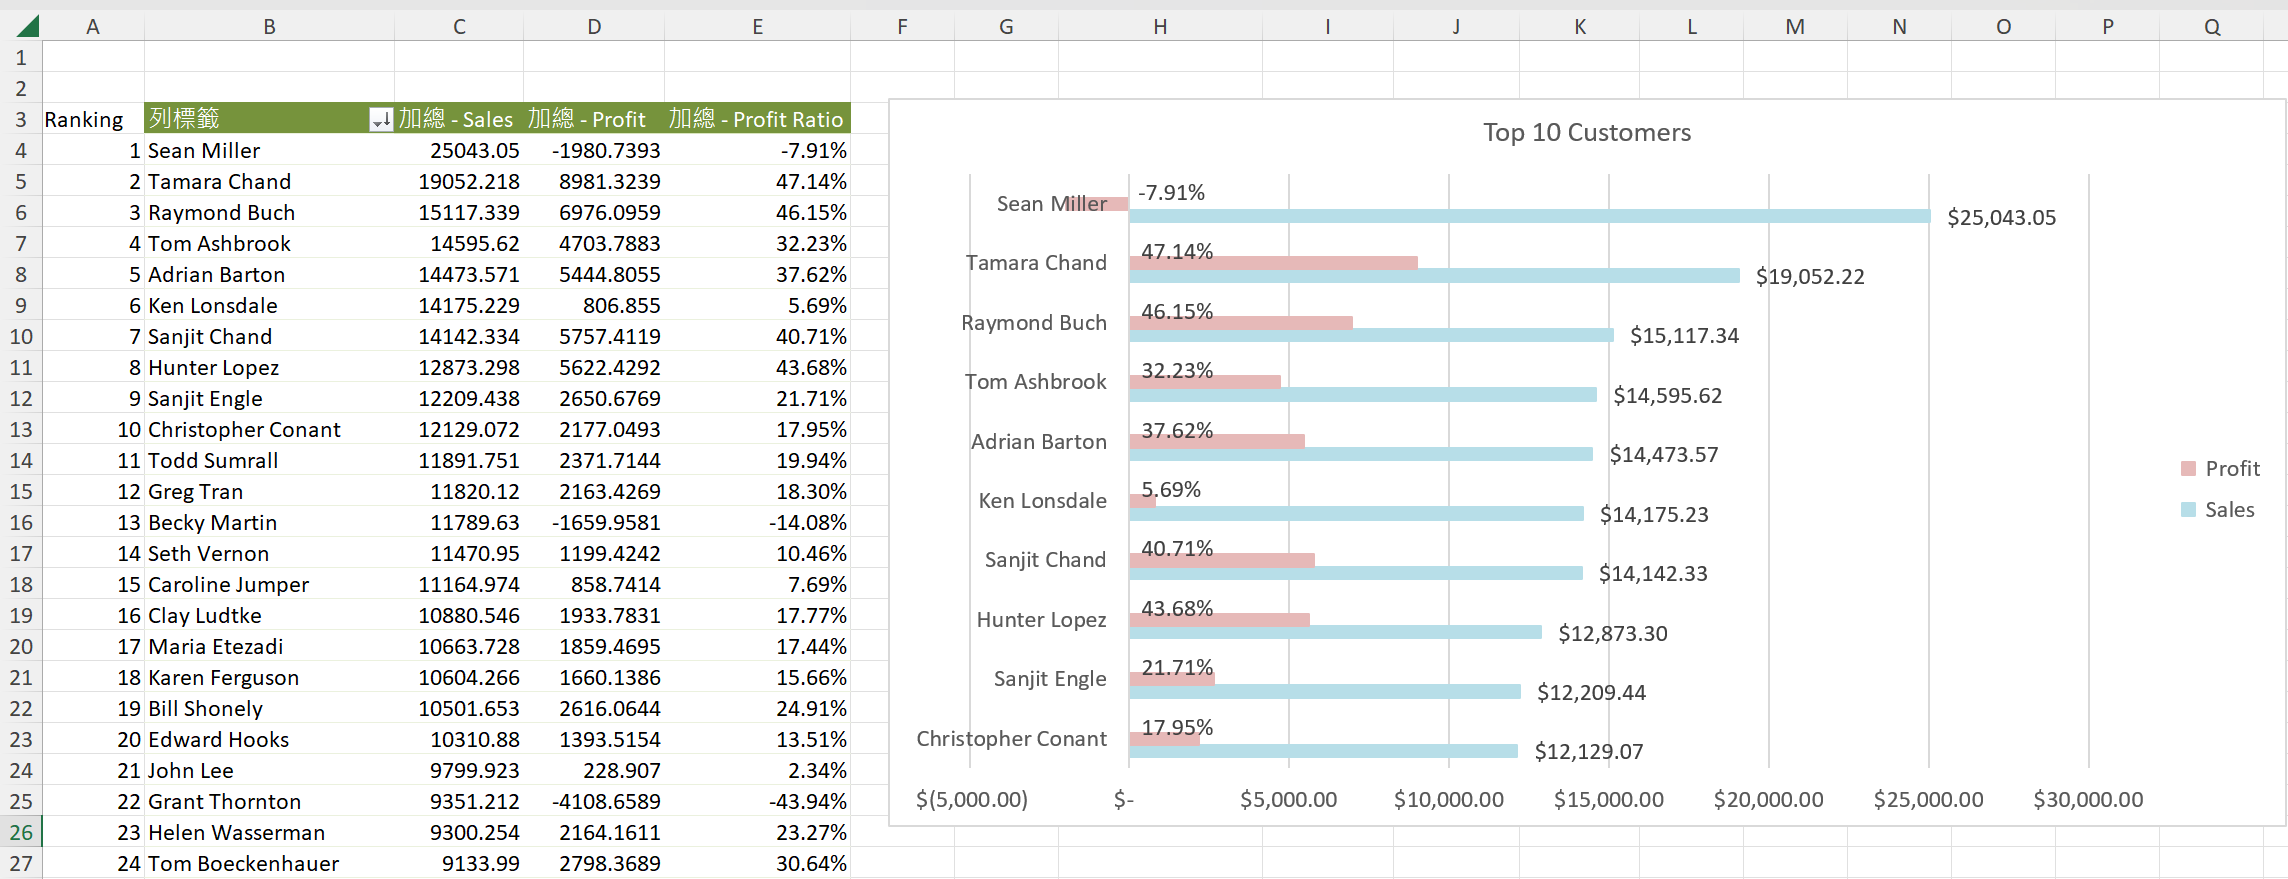

### Method 2: Tableau
* Use a Calculated field with "Sum([Profit])/Sum([Sales])" to calculate Profit Ratio
* Color the bars by Profit Ratio. (Orange < 0 < Blue)


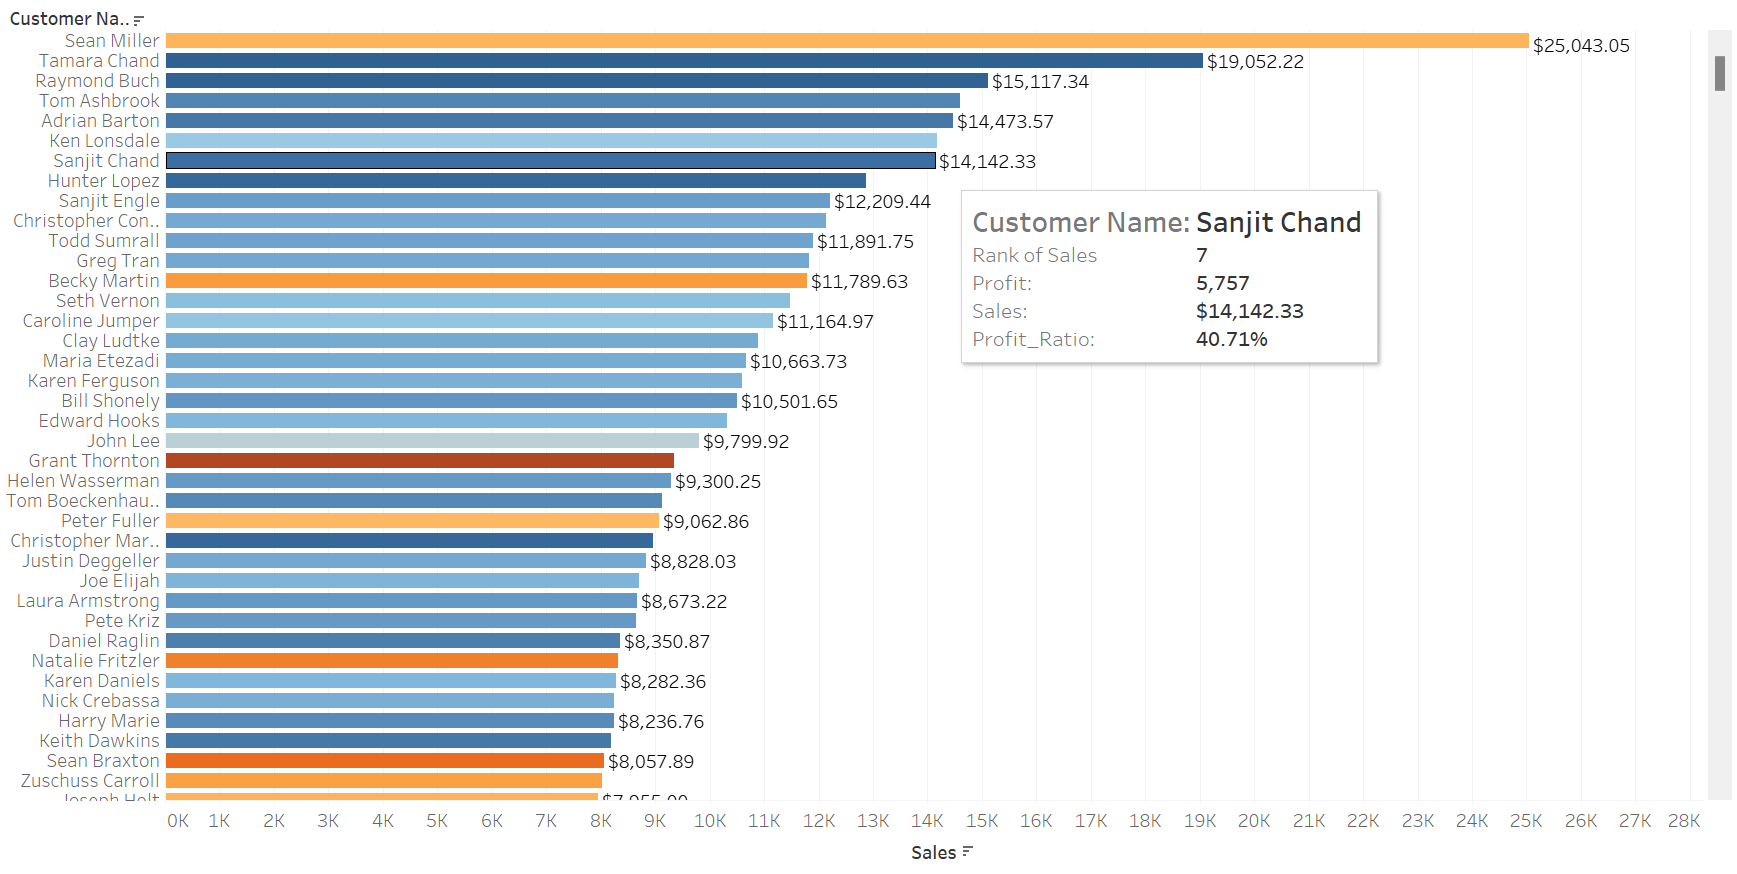

### Method 3: SQL query
* Use the following query. <br>
SELECT cus.Customer_Name, SUM(row.Sales) as Sales, SUM(row.Profit) as Profit, (SUM(row.Profit)/SUM(row.Sales)) as "Profit Ratio" <br> 
FROM Orders as ord <br>
JOIN Row as row ON row.Order_ID = ord.Order_ID <br>
JOIN Customer as cus ON cus.Customer_ID = ord.Customer_ID <br>
GROUP BY cus.Customer_Name <br>
ORDER BY Sales DESC <br>
(LIMIT 15)

In [200]:
conn = sqlite3.connect(r'superstore.db')
sql = 'SELECT cus.Customer_Name, SUM(row.Sales) as Sales, SUM(row.Profit) as Profit, (SUM(row.Profit)/SUM(row.Sales)) as "Profit Ratio" FROM Orders as ord JOIN Row as row ON row.Order_ID = ord.Order_ID JOIN Customer as cus ON cus.Customer_ID = ord.Customer_ID GROUP BY cus.Customer_Name ORDER BY Sales DESC'
df_viz7_sql = pd.read_sql_query(sql, conn)
conn.close()
df_viz7_sql

,Customer_Name,Sales,Profit,Profit Ratio
0,Sean Miller,25043.0500,-1980.7393,-0.079093
1,Tamara Chand,19052.2180,8981.3239,0.471406
2,Raymond Buch,15117.3390,6976.0959,0.461463
3,Tom Ashbrook,14595.6200,4703.7883,0.322274
4,Adrian Barton,14473.5710,5444.8055,0.376190
5,Ken Lonsdale,14175.2290,806.8550,0.056920
6,Sanjit Chand,14142.3340,5757.4119,0.407105
7,Hunter Lopez,12873.2980,5622.4292,0.436751
8,Sanjit Engle,12209.4380,2650.6769,0.217101
9,Christopher Conant,12129.0720,2177.0493,0.179490


### Method 4: Pandas Dataframe

In [241]:
df_all = pd.read_csv('Superstore.csv')
df_7 = df_all[["Customer Name","Sales", "Profit"]]
df_c = df_7[["Customer Name"]].drop_duplicates().sort_values(by=['Customer Name']).reset_index(drop=True) #distinct Customer
df_ps = df_7.groupby(["Customer Name"])[["Sales","Profit"]].sum().reset_index(drop=True) #profit, sales
df_pr = df_ps["Profit"]/df_ps["Sales"] #profit ratio
df_viz7 = pd.concat([df_c, df_ps, df_pr], axis=1)
df_viz7.columns = ["Customer Name", "Sales", "Profit", "Profit Ratio"]
df_viz7_sort = df_viz7.sort_values(by=["Sales"], ascending=False).reset_index(drop=True)
df_viz7_sort[0:16]

,Customer Name,Sales,Profit,Profit Ratio
0,Sean Miller,25043.050,-1980.7393,-0.079093
1,Tamara Chand,19052.218,8981.3239,0.471406
2,Raymond Buch,15117.339,6976.0959,0.461463
3,Tom Ashbrook,14595.620,4703.7883,0.322274
4,Adrian Barton,14473.571,5444.8055,0.376190
5,Ken Lonsdale,14175.229,806.8550,0.056920
6,Sanjit Chand,14142.334,5757.4119,0.407105
7,Hunter Lopez,12873.298,5622.4292,0.436751
8,Sanjit Engle,12209.438,2650.6769,0.217101
9,Christopher Conant,12129.072,2177.0493,0.179490


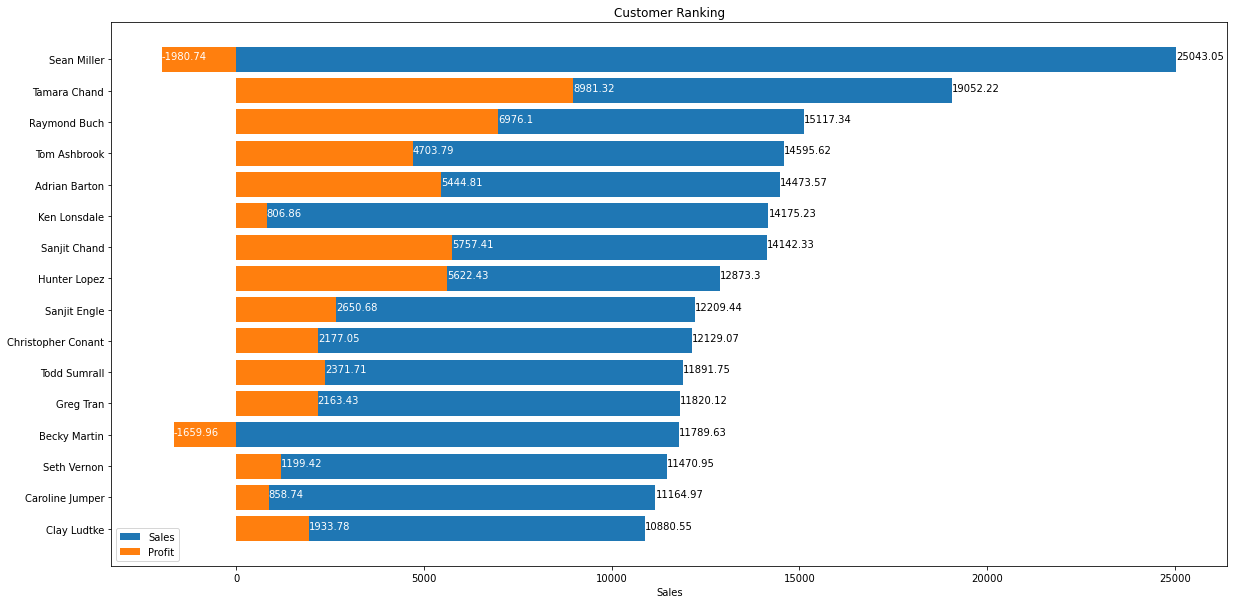

In [240]:
df_viz7 = df_viz7.sort_values(by=['Sales'])
bars = plt.barh(df_viz7["Customer Name"][-16:],df_viz7["Sales"][-16:].round(2), label="Sales")
for  bar in bars:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    plt.text(width, label_y, s=f'{width}')

bars2 = plt.barh(df_viz7["Customer Name"][-16:],df_viz7["Profit"][-16:].round(2), label="Profit")
for  bar in bars2:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    plt.text(width, label_y, s=f'{width}', c="white")
plt.title("Customer Ranking")
plt.xlabel("Sales")
plt.rcParams['figure.figsize'] = [20, 10]
plt.legend()


plt.show()